In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from scrapy.core.downloader.handlers.http11 import tunnel_request_data
from sqlalchemy.sql.operators import truediv

df = pd.read_excel('C:/data/版本1_缺失值处理_2317TW_daily_data_副本2.xlsx')


In [48]:
df.head()

,Volume_缺失值处理,Date,Open,High,Low,Close,Adj Close
0,33478780,1993-01-05,0.730803,0.744620,0.726197,0.730803,0.399521
1,46846584,1993-01-06,0.729267,0.729267,0.712379,0.718520,0.392806
2,44447315,1993-01-07,0.718520,0.729267,0.712379,0.715450,0.391128
3,43699448,1993-01-08,0.724661,0.724661,0.687814,0.693955,0.379377
4,14068903,1993-01-11,0.692420,0.709308,0.692420,0.698561,0.381895


In [49]:
# 数据处理示例：计算每日价格波动范围
df['range'] = df['High'] - df['Low']

# 数据处理示例：计算每日成交量是否高于平均成交量
df['volume_above_avg'] = df['Volume_缺失值处理'] > df['Volume_缺失值处理'].rolling(window=20).mean()
# 数据处理示例：计算移动平均线
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

# 显示处理后的数据
print(df.tail())

      Volume_缺失值处理       Date   Open   High    Low  Close  Adj Close  range  \
7984      30529852 2024-09-23  178.0  180.5  177.5  180.0      180.0    3.0   
7985      56746047 2024-09-24  179.0  184.0  178.0  183.0      183.0    6.0   
7986     117055770 2024-09-25  186.5  191.0  186.0  188.5      188.5    5.0   
7987      65079925 2024-09-26  192.0  193.0  188.5  189.5      189.5    4.5   
7988      67106252 2024-09-27  192.0  194.0  190.0  191.0      191.0    4.0   

      volume_above_avg    MA_20   MA_50  
7984             False  178.425  185.67  
7985             False  178.475  184.82  
7986              True  178.875  184.27  
7987              True  179.075  183.73  
7988              True  179.400  183.29  


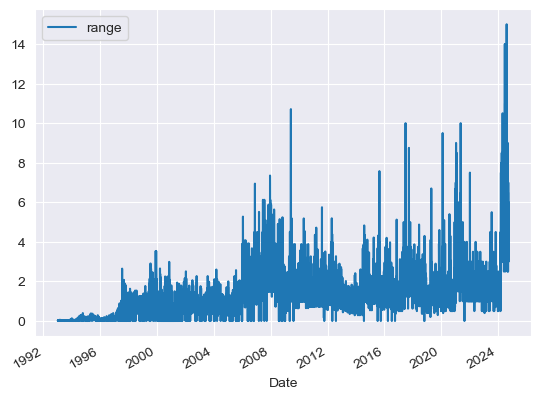

In [51]:
df.plot(x='Date', y='range')
plt.savefig('1.jpg')
plt.show()

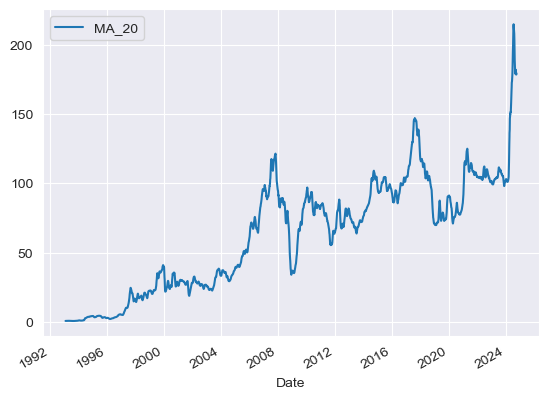

In [52]:
df.plot(x='Date', y='MA_20')
plt.savefig('2.jpg')
plt.show()

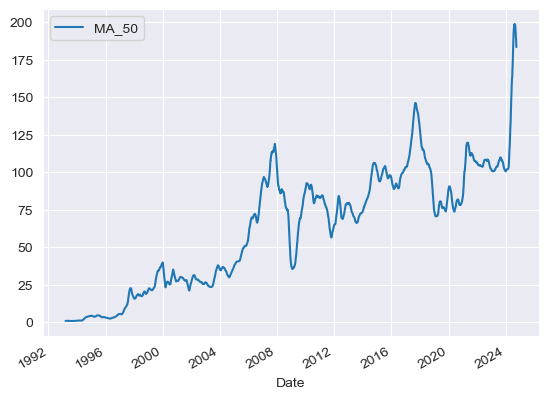

In [53]:
df.plot(x='Date', y='MA_50')
plt.savefig('3.jpg')
plt.show()

In [56]:
# 计算RSI
delta = df['Close'].diff()
delta = delta[1:]
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

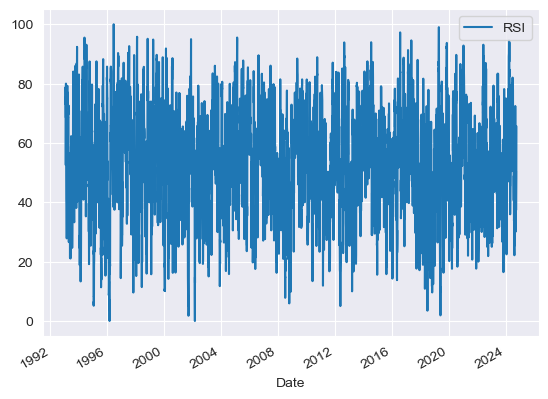

In [57]:
df.plot(x='Date', y='RSI')
plt.savefig('4.jpg')
plt.show()

<Axes: xlabel='Date'>

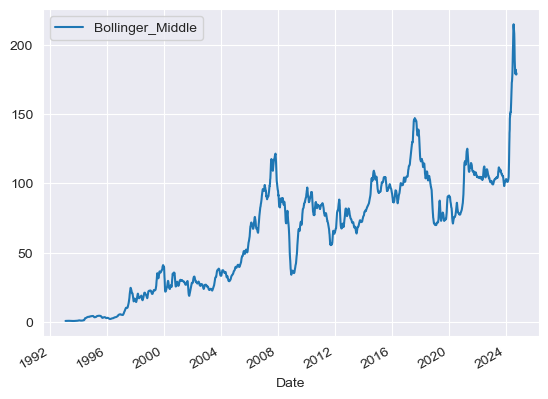

In [20]:
df['Bollinger_Middle'] = df['Close'].rolling(window=20).mean()
df['Bollinger_Up'] = df['Bollinger_Middle'] + 2 * df['Close'].rolling(window=20).std()
df['Bollinger_Low'] = df['Bollinger_Middle'] - 2 * df['Close'].rolling(window=20).std()
df.plot(x='Date', y='Bollinger_Middle')


<Axes: xlabel='Date'>

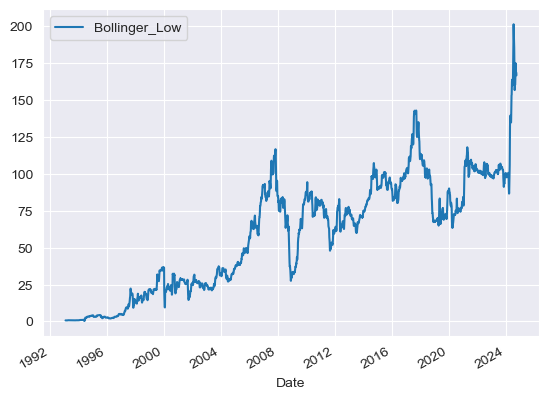

In [21]:
df.plot(x='Date', y='Bollinger_Low')

<Axes: xlabel='Date'>

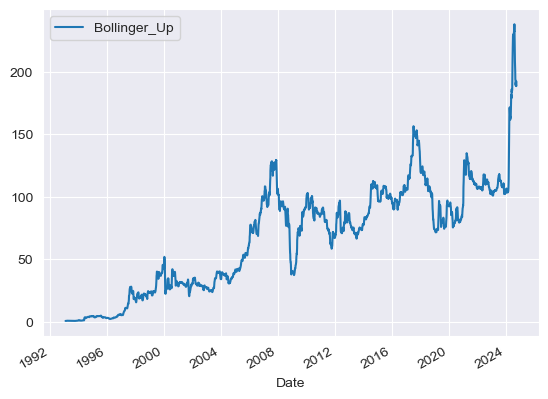

In [22]:
df.plot(x='Date', y='Bollinger_Up')

<Axes: xlabel='Date', ylabel='volume_above_avg'>

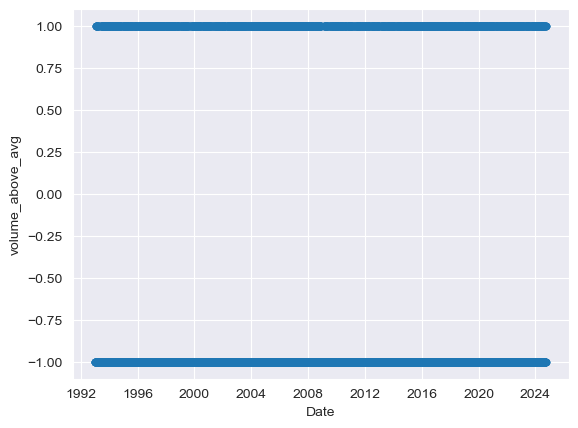